# Proyecto

## Integrantes

- Enrique Laguna Diaz
- Hector Aaron Ramirez Obregon
- Humberto Peñuelas Almeida

## Aclaracion
Debido a que creemos que los datos de nuestra primera entrega estan manipulados decidimos cambiar el tema del proyecto y el dataset. 

## Fuente de informacion

Link a la fuente de informacion
https://www.kaggle.com/datasets/kevinmorgado/us-energy-generation-2001-2022


## Unidad de analisis
Para nuestra unidad de analisis nos basaremos en que los datos son de estados de los Estados Unidos de America (US). Entonces usaremos esto como nuestra unidad de analisis, Estados Unidos de America

## Preguntas de investigacion
- ¿Cual es el tipo de energia mas usado por los estados de US?
- ¿Cual es el mayor tipo de productor de energia?
- ¿Cual es el promedio de generacion de energia por estado?
- ¿Existe un aumento en el uso de energias limpias para la generacion de energia en los estados en los ultimos 5 años registrados?

## Unidad de análisis para cada pregunta

| Pregunta | Unidad de análisis |
| --- | --- |
| ¿Cuál fue el tipo de
energía que más se produjo por estado de la Unión Americana? | Estado (STATE) |
| ¿Cuál fue el estado (o la compañía?) que produjo más energía entre 2001 y 2021? | Tipo de productor (TYPE OF PRODUCER) |
| ¿Cual fue el promedio de generacion de energia por estado entre 2001 y 2021? | Estado (STATE) |
| ¿Existe un aumento en el uso de energias limpias para la generación de energía en los estados en los últimos 5 años registrados | Generación de energía (GENERATION) |

## Justificacion del tipo de los datos
Los datos con los que estaremos trabajando para este nuevo proyecto son de tipo **longitudinales** y **de panel**. Esto es por las siguientes razones
- Los datos contienen fechas (años y meses)de cuando fueron registrados
- Se pueden clasificar por Estado, tipo de productor, tipo de energia. Estos estados se repiten durante los años registrados. Por esto se pueden catalogar como datos **de panel**, son para los mismos sujetos.
- Los datos van cambiando conforme el tiempo. Es poco probable que por la naturaleza de los datos un Estado produzca la  misma cantidad de energia en diferentes años registrados.

## Procesamiento de los datos

En esta parte del documento empezaremo con el importado y analisis de los datos. Tipo de datos, nombre de las columnas, limpieza de los datos, etc.

In [2]:
# importar librerias 
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt

In [3]:
import os
wd = os.getcwd()
wd

'd:\\ITESO\\Semestre 9\\PorgramacionParaDatos\\Proyecto\\NuevoProyecto\\Codigo'

### Importar los datos

Los datos que usaremos estan distribuidos en dos datasets. El primero con la informacion sobre la  generacion de energia  de cada estado
y el segundo con la lista de nombres de estados que aparecen en el primer dataset 

In [4]:
archivo = os.path.join(wd, '../DataSets/organised_Gen.csv')

energyDataset = pd.read_csv(archivo)
energyDataset

,Unnamed: 0,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...,...,...,...
496769,10581,2022,5,WY,"Electric Generators, Electric Utilities",Coal,2071403.0
496770,10582,2022,5,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0
496771,10583,2022,5,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0
496772,10584,2022,5,WY,"Electric Generators, Electric Utilities",Petroleum,1812.0


In [5]:
## Renombrar columna energia
energyDataset = energyDataset.rename(columns={"GENERATION (Megawatthours)": "GENERATION"})

In [6]:
statesDataset = pd.read_csv("../DataSets/states.csv")
statesDataset

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


## Exploracion de los datos

### Tipo de datos

In [7]:
# Tipo de datos
energyDataset.dtypes

Unnamed: 0            int64
YEAR                  int64
MONTH                 int64
STATE                object
TYPE OF PRODUCER     object
ENERGY SOURCE        object
GENERATION          float64
dtype: object

In [8]:
statesDataset.dtypes

State     object
Abbrev    object
Code      object
dtype: object

### Informacion sobre los datos

In [9]:
energyDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496774 entries, 0 to 496773
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        496774 non-null  int64  
 1   YEAR              496774 non-null  int64  
 2   MONTH             496774 non-null  int64  
 3   STATE             496774 non-null  object 
 4   TYPE OF PRODUCER  496774 non-null  object 
 5   ENERGY SOURCE     496774 non-null  object 
 6   GENERATION        496774 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 26.5+ MB


In [10]:
statesDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   51 non-null     object
 1   Abbrev  51 non-null     object
 2   Code    51 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


## Tipo de datos encontrados
### Categoricos
Los datos categoricos que identificamos en nuestro dataset son los siguientes
- State (Nombre del estado) | Nominal
- Type of producer (Nombre del tipo de productor de energia) | Nominal
- Energy source (Nombre de la fuente de energia) | Nominal
### Numericos
Los datos numericos que identificamos en nuestro dataset son los siguientes
- Year (Año) | Continuos de intervalo
- Month (Mes) | Continous de intervalo
- Generation "Megawatts/hours" | Intervalo

### Columnas de los datasets

In [11]:
energyDataset.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER',
       'ENERGY SOURCE', 'GENERATION'],
      dtype='object')

In [12]:
statesDataset.columns

Index(['State', 'Abbrev', 'Code'], dtype='object')

## Liempieza de datos (valores nulos, registros vacios, valores extraños)

In [13]:
energyDataset.isnull().sum()

Unnamed: 0          0
YEAR                0
MONTH               0
STATE               0
TYPE OF PRODUCER    0
ENERGY SOURCE       0
GENERATION          0
dtype: int64

In [14]:
energyDataset.isna().sum()

Unnamed: 0          0
YEAR                0
MONTH               0
STATE               0
TYPE OF PRODUCER    0
ENERGY SOURCE       0
GENERATION          0
dtype: int64

In [15]:
statesDataset.isnull().sum()

State     0
Abbrev    0
Code      0
dtype: int64

In [16]:
statesDataset.isna().sum()

State     0
Abbrev    0
Code      0
dtype: int64

In [17]:
registersBellowCero = energyDataset.loc[energyDataset['GENERATION'] <= 0]
index = registersBellowCero.index
numberOfRowsBelowCero = len(index)
registersBellowCero


,Unnamed: 0,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
84,84,2001,1,AZ,Total Electric Power Industry,Solar Thermal and Photovoltaic,0.0
93,93,2001,1,AZ,"Electric Generators, Electric Utilities",Solar Thermal and Photovoltaic,0.0
94,94,2001,1,AZ,"Electric Generators, Electric Utilities",Other Biomass,0.0
118,118,2001,1,CA,Total Electric Power Industry,Pumped Storage,-36255.0
127,127,2001,1,CA,"Electric Generators, Electric Utilities",Geothermal,-45.0
...,...,...,...,...,...,...,...
496707,10519,2022,5,WI,"Electric Generators, Independent Power Producers",Petroleum,-11.0
496726,10538,2022,5,WV,Total Electric Power Industry,Other,-1099.0
496738,10550,2022,5,WV,"Electric Generators, Independent Power Producers",Other,-1099.0
496739,10551,2022,5,WV,"Electric Generators, Independent Power Producers",Petroleum,0.0


In [18]:
numberOfRowsBelowCero

44323

In [19]:
newEnergyDataFrameWithoutColumn = energyDataset.drop(columns=['Unnamed: 0'])
newEnergyDataFrameWithoutColumn

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,2001,1,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...,...,...
496769,2022,5,WY,"Electric Generators, Electric Utilities",Coal,2071403.0
496770,2022,5,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0
496771,2022,5,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0
496772,2022,5,WY,"Electric Generators, Electric Utilities",Petroleum,1812.0


In [20]:
newEnergyDataFrameWithoutColumn.to_csv('Clean_Energy.csv', header=True, index=False, encoding='utf-8')


### Hallazgo
Al parecer hay registros que tienen energia negativa o energia igual a 0. Procederemosa eliminar esos datos ya que podrian afectar nuestros resultados en un futuro

In [21]:
energyDataset = energyDataset[energyDataset["GENERATION"] > 0]

## Hallazgo
Nuestros dataset estan completos, con esto nos referimos a que no hay datos faltantes en ninguna de las columnas. Sinceramente es la primera vez que vemos un Dataset completo. El dataset con el que trabajamos anteriormente tenia bastantes datos faltantes

## Estadistica descriptiva de las columnas (Análisis Univariado)

Esta parte del documento se basa en el análisis de solo una variable (columna). 

In [22]:
energyDataset.dtypes

Unnamed: 0            int64
YEAR                  int64
MONTH                 int64
STATE                object
TYPE OF PRODUCER     object
ENERGY SOURCE        object
GENERATION          float64
dtype: object

### Aclaracion
Las 3 primeras columnas (YEAR, MONTH, STATE) no consideramos necesario hacerle un analisis mas profundo debido a los datos con los que  estamos trabajando.

### Categorias de Type of Producer


In [23]:
catTypeProducer = energyDataset['TYPE OF PRODUCER'].value_counts()
print(catTypeProducer)

Total Electric Power Industry                       125907
Electric Generators, Electric Utilities              83318
Electric Generators, Independent Power Producers     82695
Combined Heat and Power, Industrial Power            71554
Combined Heat and Power, Commercial Power            47508
Combined Heat and Power, Electric Power              41469
Name: TYPE OF PRODUCER, dtype: int64


C:\Users\Enriq\AppData\Local\Temp\ipykernel_20340\217096129.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(nameTypeOfProducers, rotation = 90)


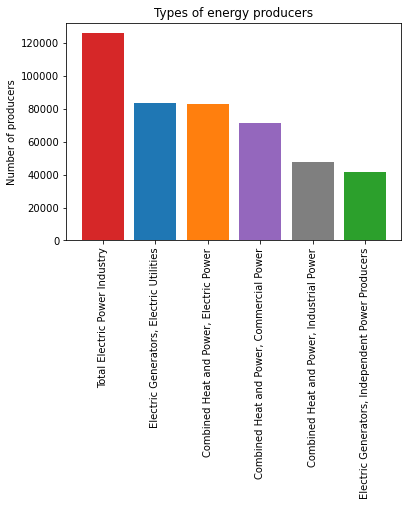

In [25]:
nameTypeOfProducers = energyDataset['TYPE OF PRODUCER'].unique()
bar_colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:purple', 'tab:gray', 'tab:green']

fig, ax = plt.subplots()
ax.bar(nameTypeOfProducers, catTypeProducer,  color=bar_colors)
ax.set_ylabel('Number of producers')
ax.set_title('Types of energy producers')
ax.set_xticklabels(nameTypeOfProducers, rotation = 90)

plt.show()

### Categorias de ENERGY TYPE

In [24]:
catEnergyType = energyDataset['ENERGY SOURCE'].value_counts()
print(catEnergyType)

Total                             72390
Natural Gas                       64296
Petroleum                         54753
Coal                              43187
Other Biomass                     42819
Hydroelectric Conventional        38332
Other                             29404
Wood and Wood Derived Fuels       26034
Wind                              25003
Solar Thermal and Photovoltaic    18857
Nuclear                           16595
Other Gases                       14632
Geothermal                         4147
Pumped Storage                     2002
Name: ENERGY SOURCE, dtype: int64


C:\Users\haaro\AppData\Local\Temp\ipykernel_20912\238242943.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(nameTypeOfProducers, rotation = 90)


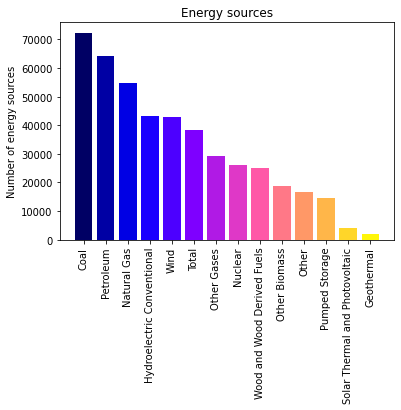

In [25]:
fig2, ax2 = plt.subplots()


nameTypeOfProducers = energyDataset['ENERGY SOURCE'].unique()
colorsEnergyType = plt.get_cmap('gnuplot2')(np.linspace(0.1, 0.9, len(catEnergyType)))
ax2.bar(nameTypeOfProducers, catEnergyType, color=colorsEnergyType)

ax2.set_ylabel('Number of energy sources')
ax2.set_title('Energy sources')
ax2.set_xticklabels(nameTypeOfProducers, rotation = 90)

plt.show()


### Valores maximo y minimo de Generation megawatts/hour

In [26]:
maxEnergyGen = energyDataset['GENERATION'].max()
minEnergyGen = energyDataset['GENERATION'].min()
print(f'Max energy gen: {maxEnergyGen}\t Min energy gen: {minEnergyGen}')

Max energy gen: 421796659.0	 Min energy gen: 0.01


# Corregir esto o borrarlo

### Promedio de energia generada
Este promedio de energía generada es apartir de Enero 2001 hasta la última fecha registrada en nuestros datos.

In [27]:
meanEnergyGen = energyDataset['GENERATION'].mean()
print(f'{meanEnergyGen} megawatts/hora')

1531162.281433658 megawatts/hora
